In [15]:
import pandas as pd
import unicodedata
import jieba
import jieba.posseg as pseg
jieba.enable_paddle()
%matplotlib inline

Paddle enabled successfully......


In [8]:
df = pd.read_csv('train.csv', dtype=str)

In [11]:
df.head()

,category,query1,query2,label
0,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后咯血是什么原因？,1
1,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后为什么会咯血？,1
2,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后咯血，应该怎么处理？,0
3,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后咯血，需要就医吗？,0
4,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后咯血，是否很严重？,0


In [39]:
df[df.label.isnull()]

,category,query1,query2,label
350,支原体肺炎,小儿 支原体 肺炎 怎样 能 彻底 治愈,小儿 支原体 肺炎 如何 根治,NaN
351,支原体肺炎,小儿 支原体 肺炎 怎样 能 彻底 治愈,小儿 支原体 肺炎 怎样 可以 彻底 治 好,NaN
352,支原体肺炎,小儿 支原体 肺炎 怎样 能 彻底 治愈,小孩 支原体 肺炎 多久 能 痊愈,NaN
353,支原体肺炎,小儿 支原体 肺炎 怎样 能 彻底 治愈,如何 诊断 小儿 支原体 肺炎,NaN
354,支原体肺炎,小儿 支原体 肺炎 怎样 能 彻底 治愈,小儿 支原体 肺炎 有 哪些 病症,NaN
8052,哮喘,请问 怎么 可以 治疗 哮喘病,哮喘病 发 吃 什么 有效,NaN


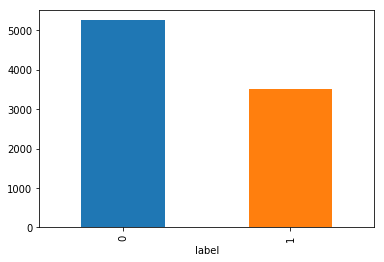

In [10]:
df.groupby("label")['query1'].count().plot.bar()

In [14]:
a = 100
for i in range(a,a+10):
    print(df.query1[i])
    print(df.query2[i])
    print()

请问百令胶囊一天吃多少？
请问百令胶囊一天需要服用多少呢？

请问百令胶囊一天吃多少？
请问百令胶囊是一日三次吗？

请问百令胶囊一天吃多少？
请问百令胶囊的效果怎么样？

请问百令胶囊一天吃多少？
请问百令胶囊是苦的还是咸的？

请问百令胶囊一天吃多少？
请问百令胶囊的注意事项是什么？

康尔佳益肺止咳胶囊发烧了是不是副作用？
康尔佳益肺止咳胶囊会不会产生发烧的副作用？

康尔佳益肺止咳胶囊发烧了是不是副作用？
康尔佳益肺止咳胶囊是不是会有发烧的不良反应？

康尔佳益肺止咳胶囊发烧了是不是副作用？
康尔佳益肺止咳胶囊有什么作用？

康尔佳益肺止咳胶囊发烧了是不是副作用？
康尔佳益肺止咳胶囊可以治疗发烧吗？

康尔佳益肺止咳胶囊发烧了是不是副作用？
康尔佳益肺止咳胶囊怎么服用？



In [17]:
def words(s):
    s = unicodedata.normalize('NFKC', s).lower()
    return [word for word, pos in pseg.cut(s, use_paddle=True) if pos != 'w']

def clean(s):
    return ' '.join(words(s))

In [18]:
df['query1'] = df['query1'].apply(clean)
df['query2'] = df['query2'].apply(clean)

In [19]:
a = 100
for i in range(a,a+10):
    print(df.query1[i])
    print(df.query2[i])
    print()

请问 百令胶囊 一天 吃 多少
请问 百令胶囊 一天 需要 服用 多少 呢

请问 百令胶囊 一天 吃 多少
请问 百令胶囊 是 一日 三次 吗

请问 百令胶囊 一天 吃 多少
请问 百令胶囊 的 效果 怎么样

请问 百令胶囊 一天 吃 多少
请问 百令胶囊 是 苦 的 还是 咸 的

请问 百令胶囊 一天 吃 多少
请问 百令胶囊 的 注意 事项 是 什么

康尔佳益肺止咳胶囊 发烧 了 是不是 副作用
康尔佳益肺止咳胶囊 会不会 产生 发烧 的 副作用

康尔佳益肺止咳胶囊 发烧 了 是不是 副作用
康尔佳益肺止咳胶囊 是不是 会 有 发烧 的 不良 反应

康尔佳益肺止咳胶囊 发烧 了 是不是 副作用
康尔佳益肺止咳胶囊 有 什么 作用

康尔佳益肺止咳胶囊 发烧 了 是不是 副作用
康尔佳益肺止咳胶囊 可以 治疗 发烧 吗

康尔佳益肺止咳胶囊 发烧 了 是不是 副作用
康尔佳益肺止咳胶囊 怎么 服用



# bow + xgboost Mode

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import scipy
import xgboost as xgb

In [40]:
df = df.dropna(how="any").reset_index(drop=True)

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(pd.concat((df['query1'],df['query2'])).unique())
trainq1_trans = count_vect.transform(df['query1'].values)
trainq2_trans = count_vect.transform(df['query2'].values)
labels = df['label'].values
X = scipy.sparse.hstack((trainq1_trans, trainq2_trans))
y = labels

In [41]:
X_train,X_valid,y_train,y_valid = train_test_split(X, y, test_size = 0.33, random_state = 42)
xgb_model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1,
                              colsample_bytree=.7, gamma=0, reg_alpha=4,
                              objective='binary:logistic', eta=0.3,
                              silent=1, subsample=0.8).fit(X_train, y_train) 
xgb_prediction = xgb_model.predict(X_valid)

In [42]:
from sklearn.metrics import f1_score, classification_report, accuracy_score

print('training score:', f1_score(y_train, xgb_model.predict(X_train), average='macro'))
print('validation score:', f1_score(y_valid, xgb_model.predict(X_valid), average='macro'))
print(classification_report(y_valid, xgb_prediction))

training score: 0.9196611105426475
validation score: 0.7726977947872238
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1745
           1       0.72      0.73      0.73      1142

    accuracy                           0.78      2887
   macro avg       0.77      0.77      0.77      2887
weighted avg       0.78      0.78      0.78      2887

